## Problem Statement:

- Nowadays, traffic is a major issue for everyone, and it is a source of stress for anyone
  who has to deal with it on a daily basis. The growth of the population delays traffic and
  makes it worse day by day. The settlement of modern civilization looks at it, but it is
  unable to act in such a way as to protect people. We can watch traffic, collect data, and
  anticipate the next and subsequent observations using a variety of approaches and
  patterns. The observation agency then makes observations, which are then required out
  and predictions are made. Being stuck in a cosmopolitan city's traffic is the most
  common occurrence in one's life.
  
  
## Goal  

- The goal of this project is to build a prediction model using multiple machine learning
techniques and to use a template to document the end-to-end stages. We're trying to
forecast the value of a continuous variable with the Metro Interstate Traffic Volume
dataset, which is a regression issue.

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.express as px

In [201]:
df = pd.read_csv(r"D:\data collection\Metro_Interstate_Traffic_Volume.csv\Metro_Interstate_Traffic_Volume.csv")

In [202]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


### Data Dictionary

- holiday Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp Numeric Average temp in kelvin
- rain_1h Numeric Amount in mm of rain that occurred in the hour
- snow_1h Numeric Amount in mm of snow that occurred in the hour
- clouds_all Numeric Percentage of cloud cover
- weather_main Categorical Short textual description of the current weather
- weather_description Categorical Longer textual description of the current weather
- date_time DateTime Hour of the data collected in local CST time
- traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [203]:
print('max_time:  ' +df.date_time.max())
print('min_time:  ' +df.date_time.min())

max_time:  2018-09-30 23:00:00
min_time:  2012-10-02 09:00:00


In [204]:
df["holiday"].value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [205]:
df["date_time"] = pd.to_datetime(df["date_time"], 
 format = "%Y-%m-%d %H:%M:%S", 
 errors = "coerce")

In [206]:
df["date_time_year"] = df["date_time"].dt.year
df["date_time_month"] = df["date_time"].dt.month
df["date_time_week"] = df["date_time"].dt.week
df["date_time_day"] = df["date_time"].dt.day
df["date_time_hour"] = df["date_time"].dt.hour
df["date_time_min"] = df["date_time"].dt.minute
df["date_time_dayofweek"] = df["date_time"].dt.dayofweek

C:\Users\DELL\AppData\Local\Temp\ipykernel_17296\4222008826.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [207]:
# Dropping Date_time column
df = df.drop(["date_time"],axis=1)

### Outlier detection

In [208]:
(df['temp'] == 0).sum()

10

In [209]:
fig = px.box(df, y="temp")
fig.show()

In [210]:
outlier = list(df["temp"])

In [211]:
new = []
for i in outlier:
    if i == 0:
        #replacing outlier with minimum value
        new.append(243.39)
    else:
        new.append(i)
        

In [212]:
new

[288.28,
 289.36,
 289.58,
 290.13,
 291.14,
 291.72,
 293.17,
 293.86,
 294.14,
 293.1,
 290.97,
 289.38,
 288.61,
 287.16,
 285.45,
 284.63,
 283.47,
 281.18,
 281.09,
 279.53,
 278.62,
 278.23,
 278.12,
 282.48,
 291.97,
 293.23,
 294.31,
 295.17,
 295.13,
 293.66,
 290.65,
 288.19,
 287.1,
 286.25,
 285.26,
 284.55,
 283.47,
 283.17,
 282.04,
 281.69,
 281.32,
 280.74,
 280.57,
 281.86,
 284.98,
 289.18,
 291.55,
 294.97,
 296.38,
 297.32,
 298.17,
 298.06,
 297.67,
 296.36,
 293.85,
 292.43,
 291.77,
 291.36,
 291.12,
 290.63,
 290.46,
 289.26,
 283.21,
 282.24,
 281.69,
 280.57,
 280.02,
 280.11,
 280.0,
 280.53,
 281.43,
 281.78,
 281.91,
 281.73,
 281.42,
 280.87,
 280.15,
 279.78,
 279.65,
 279.22,
 279.06,
 278.81,
 278.55,
 278.59,
 276.99,
 276.35,
 275.4,
 275.17,
 274.99,
 275.09,
 276.88,
 278.04,
 279.08,
 280.12,
 280.25,
 280.0,
 279.06,
 278.91,
 278.39,
 278.16,
 278.16,
 277.93,
 276.9,
 276.34,
 276.11,
 275.73,
 275.65,
 275.51,
 275.05,
 274.77,
 274.77,
 275.55

In [213]:
df["temp"] = new

In [214]:
df["temp"].sort_values()

11946    243.39
11947    243.39
11948    243.39
11949    243.39
11950    243.39
          ...  
45426    308.87
44456    308.95
45425    309.08
45424    309.29
44457    310.07
Name: temp, Length: 48204, dtype: float64

In [215]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,date_time_year,date_time_month,date_time_week,date_time_day,date_time_hour,date_time_min,date_time_dayofweek
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,40,2,9,0,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,40,2,10,0,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,40,2,11,0,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,40,2,12,0,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,40,2,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543,2018,9,39,30,19,0,6
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,2018,9,39,30,20,0,6
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,2018,9,39,30,21,0,6
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,1450,2018,9,39,30,22,0,6


## 1 . Traffic Trend Over Years

In [216]:
plot1 = df.groupby('date_time_year')['traffic_volume'].mean().to_dict()

In [217]:
myList = plot1.items()
myList = sorted(myList) 
x, y = zip(*myList) 

In [218]:
fig = px.line(df, x=x, y=y, title='Traffic Trend Over Years')
fig.update_layout(
    autosize=False,
    width=500,
    height=400,)
fig.update_xaxes(title_text='Years' )
fig.update_yaxes(range = [3000,4000] ,title_text='Mean Traffic Volume' )
fig.show()

## 2 . Traffic Trend in 24 Hours

In [219]:
plot2 = df.groupby('date_time_hour')['traffic_volume'].mean().to_dict()

In [220]:
plot2

{0: 834.7810505645557,
 1: 516.448999511957,
 2: 388.35364041604754,
 3: 371.0908641975309,
 4: 702.5518890483022,
 5: 2094.573436742608,
 6: 4140.503593675132,
 7: 4740.181337181337,
 8: 4587.497115384615,
 9: 4385.277502477701,
 10: 4184.665543792108,
 11: 4465.8775614754095,
 12: 4718.293094629156,
 13: 4714.940682414698,
 14: 4931.888776028441,
 15: 5240.52430196484,
 16: 5663.756539235413,
 17: 5310.076047594413,
 18: 4263.718529707956,
 19: 3276.39418663947,
 20: 2834.66750884285,
 21: 2668.940464177598,
 22: 2199.405717151454,
 23: 1469.1352941176472}

In [221]:
myList = plot2.items()
myList = sorted(myList) 
x, y = zip(*myList) 

In [222]:
fig = px.line(df, x=x, y=y, title='Traffic Trend in day')
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)
fig.update_xaxes(range = [0,23],title_text='Hours(24hrs per day)' )
fig.update_yaxes(range = [100,8000] ,title_text='Mean Traffic Volume' )
fig.show()

## 3.  Trend During various climate

In [223]:
plot3 = df.groupby('weather_main')['traffic_volume'].mean().to_dict()
plot3

{'Clear': 3055.908819356284,
 'Clouds': 3618.449749406489,
 'Drizzle': 3290.727073036793,
 'Fog': 2703.720394736842,
 'Haze': 3502.1014705882353,
 'Mist': 2932.956638655462,
 'Rain': 3317.9055007052184,
 'Smoke': 3237.65,
 'Snow': 3016.844228094576,
 'Squall': 2061.75,
 'Thunderstorm': 3001.6208897485494}

In [224]:
myList = plot3.items()
myList = sorted(myList) 
x, y = zip(*myList) 

In [225]:
fig = px.line(df, x=x, y=y, title='Traffic Trend During different climate')
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)
fig.update_xaxes(title_text='Climate' )
fig.update_yaxes(range = [1000,5000] ,title_text='Mean Traffic Volume' )
fig.show()

## 4. Traffic Analysis During Holidays

In [226]:
plot4 = df.groupby('holiday')['traffic_volume'].mean().to_dict()
plot4

{'Christmas Day': 827.5,
 'Columbus Day': 519.4,
 'Independence Day': 1076.0,
 'Labor Day': 1013.1428571428571,
 'Martin Luther King Jr Day': 612.6666666666666,
 'Memorial Day': 1107.6,
 'New Years Day': 1356.0,
 'None': 3262.852169578132,
 'State Fair': 634.8,
 'Thanksgiving Day': 933.5,
 'Veterans Day': 691.4,
 'Washingtons Birthday': 635.2}

In [227]:
myList = plot4.items()
myList = sorted(myList) 
x, y = zip(*myList) 

In [228]:
fig = px.line(df, x=x, y=y, title='Traffic Trend During different climate')
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)
fig.update_xaxes(title_text='Climate' )
fig.update_yaxes(range = [100,4000] ,title_text='Mean Traffic Volume' )
fig.show()

In [229]:
# plot5 = df.groupby(['date_time_month','date_time_hour'])['weather_description'].agg(pd.Series.mode).to_dict()
# plot5

##  5 .Rain VS Traffic  , Snow Vs Traffic 

In [230]:
plot5 = df.groupby('date_time_month')['rain_1h'].mean().to_dict()
plot5

myList = plot5.items()
myList = sorted(myList) 
x, y = zip(*myList)

In [231]:
plot6 = df.groupby('date_time_month')['traffic_volume'].mean().to_dict()
plot6

myList = plot6.items()
myList = sorted(myList) 
A, B = zip(*myList) 

In [232]:
plot8 = df.groupby('date_time_month')['snow_1h'].sum().to_dict()
plot8

myList = plot8.items()
myList = sorted(myList) 
C, D = zip(*myList)

In [233]:
plot8

{1: 2.87,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 7.8500000000000005}

In [234]:
fig = px.bar(x=x, y=y,title='Months Average RainFall')
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,)
fig.update_xaxes(title_text='Months' )
fig.update_yaxes(title_text='Mean Traffic Volume' )
fig.show()


fig = px.line(df, x=A, y=B, title='Months Average Traffic')
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,)
fig.update_xaxes(title_text='Months' )
fig.update_yaxes(title_text='Mean Traffic Volume' )
fig.show()



fig = px.bar(x=C, y=D,title='Months Average SnowFall')
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,)
fig.update_xaxes(title_text='Months' )
fig.update_yaxes(title_text='Mean Traffic Volume' )
fig.show()


## 7 . Traffic Volume VS Temperature

In [235]:
plot7 = df.groupby(pd.cut(df.temp, [243,250,255,260,280,290,300,310,320]))['traffic_volume'].mean().to_dict()
plot7

{Interval(243, 250, closed='right'): 2276.08938547486,
 Interval(250, 255, closed='right'): 2687.2224744608397,
 Interval(255, 260, closed='right'): 3003.2531576057113,
 Interval(260, 280, closed='right'): 3131.3888125198264,
 Interval(280, 290, closed='right'): 3173.9064253393667,
 Interval(290, 300, closed='right'): 3427.1900578208306,
 Interval(300, 310, closed='right'): 4587.874865735768,
 Interval(310, 320, closed='right'): 3810.0}

In [236]:
plot7 = {"(243K, 250K)": 2276.08938547486,
 '(250K-255K)': 2687.2224744608397,
 '(255K-260K)': 3003.2531576057113,
 '(260K-280K)': 3131.3888125198264,
 '(280K-290)': 3173.9064253393667,
 '(290k-300k)': 3427.1900578208306,
 '(300k-310k)': 4587.874865735768,
 '(310k-320k)': 3810.0}

In [237]:
myList = plot7.items()
myList = sorted(myList) 
x, y = zip(*myList) 

In [238]:
fig = px.line(df, x=x, y=y, title='Traffic Trend VS Temperature')
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)
fig.update_xaxes(title_text='Temperature in K' )
fig.update_yaxes(range = [2000,5000] ,title_text='Mean Traffic Volume' )
fig.show()

### 8.Common CLimate

In [239]:
names = list(df["weather_main"].unique())

In [240]:
df["weather_main"].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [241]:
fig = px.pie(df, values=df["weather_main"].value_counts(), names=names, title='Population of European continent')
fig.show()

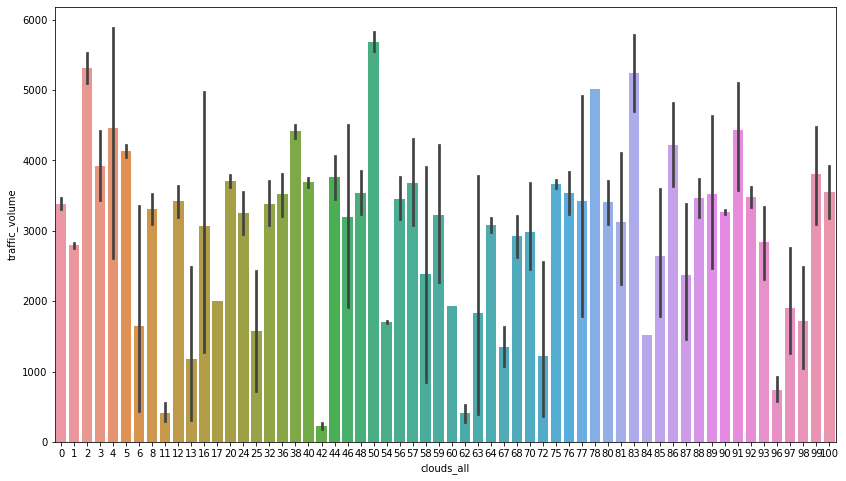

In [242]:
#Plotting traffic volume over clouds_all
plt.figure(figsize=(14,8))
sns.barplot(x='clouds_all', y = 'traffic_volume', data = df)
plt.show()

In [243]:
des = df["weather_description"].value_counts().to_dict()
des

{'sky is clear': 11665,
 'mist': 5950,
 'overcast clouds': 5081,
 'broken clouds': 4666,
 'scattered clouds': 3461,
 'light rain': 3372,
 'few clouds': 1956,
 'light snow': 1946,
 'Sky is Clear': 1726,
 'moderate rain': 1664,
 'haze': 1360,
 'light intensity drizzle': 1100,
 'fog': 912,
 'proximity thunderstorm': 673,
 'drizzle': 651,
 'heavy snow': 616,
 'heavy intensity rain': 467,
 'snow': 293,
 'proximity shower rain': 136,
 'thunderstorm': 125,
 'heavy intensity drizzle': 64,
 'thunderstorm with heavy rain': 63,
 'thunderstorm with light rain': 54,
 'proximity thunderstorm with rain': 52,
 'thunderstorm with rain': 37,
 'smoke': 20,
 'very heavy rain': 18,
 'thunderstorm with light drizzle': 15,
 'light intensity shower rain': 13,
 'proximity thunderstorm with drizzle': 13,
 'light shower snow': 11,
 'light rain and snow': 6,
 'shower drizzle': 6,
 'SQUALLS': 4,
 'sleet': 3,
 'thunderstorm with drizzle': 2,
 'freezing rain': 2,
 'shower snow': 1}

In [244]:
des1 = {'sky is clear': 11665,
 'mist': 5950,
 'overcast clouds': 5081,
 'broken clouds': 4666,
 'scattered clouds': 3461,
 'light rain': 3372,
 'few clouds': 1956,
 'light snow': 1946,
 'Sky is Clear': 11665,
 'moderate rain': 1664,
 'haze': 1360,
 'light intensity drizzle': 1100,
 'fog': 912,
 'proximity thunderstorm': 673,
 'drizzle': 651,
 'heavy snow': 616,
 'heavy intensity rain': 467,
 'snow': 293,
 'proximity shower rain': 136,
 'thunderstorm': 125,
 'heavy intensity drizzle': 64,
 'thunderstorm with heavy rain': 63,
 'thunderstorm with light rain': 54,
 'proximity thunderstorm with rain': 52,
 'thunderstorm with rain': 37,
 'smoke': 20,
 'very heavy rain': 18,
 'thunderstorm with light drizzle': 15,
 'light intensity shower rain': 13,
 'proximity thunderstorm with drizzle': 12,
 'light shower snow': 11,
 'light rain and snow': 6,
 'shower drizzle': 5,
 'SQUALLS': 4,
 'sleet': 3,
 'thunderstorm with drizzle': 7,
 'freezing rain': 2,
 'shower snow': 1}

df["weather_description"] = df["weather_description"].map(des1)

In [245]:
main = df["weather_main"].value_counts().to_dict()
main

{'Clouds': 15164,
 'Clear': 13391,
 'Mist': 5950,
 'Rain': 5672,
 'Snow': 2876,
 'Drizzle': 1821,
 'Haze': 1360,
 'Thunderstorm': 1034,
 'Fog': 912,
 'Smoke': 20,
 'Squall': 4}

In [246]:
df["weather_main"] = df["weather_main"].map(main)

In [247]:
main1 = df["holiday"].value_counts().to_dict()
main1

{'None': 48143,
 'Labor Day': 7,
 'Thanksgiving Day': 6,
 'Christmas Day': 6,
 'New Years Day': 6,
 'Martin Luther King Jr Day': 6,
 'Columbus Day': 5,
 'Veterans Day': 5,
 'Washingtons Birthday': 5,
 'Memorial Day': 5,
 'Independence Day': 5,
 'State Fair': 5}

In [248]:
main2 = {'State Fair': 1,
 'Labor Day': 2,
 'Thanksgiving Day': 3,
 'Christmas Day': 4,
 'New Years Day': 5,
 'Martin Luther King Jr Day': 6,
 'Columbus Day': 7,
 'Veterans Day': 8,
 'Washingtons Birthday': 9,
 'Memorial Day': 10,
 'Independence Day': 11,
 'None': 12}

df["holiday"] = df["holiday"].map(main2)

In [249]:
df = df.drop(["date_time_min"],axis=1)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  int64  
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  int64  
 6   weather_description  48204 non-null  int64  
 7   traffic_volume       48204 non-null  int64  
 8   date_time_year       48204 non-null  int64  
 9   date_time_month      48204 non-null  int64  
 10  date_time_week       48204 non-null  int64  
 11  date_time_day        48204 non-null  int64  
 12  date_time_hour       48204 non-null  int64  
 13  date_time_dayofweek  48204 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 5.1 MB


In [251]:
#split data into X and y
X = df.drop("traffic_volume" , axis=1)

y = df["traffic_volume"]

### Feature Selection

In [252]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [253]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)


In [254]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [255]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [256]:
featureScores

,Specs,Score
0,holiday,3.992492e+01
1,temp,5.538258e+03
2,rain_1h,3.215193e+07
3,snow_1h,3.998247e+03
4,clouds_all,2.901680e+05
5,weather_main,2.652667e+07
6,weather_description,2.197494e+07
7,date_time_year,1.642245e+01
8,date_time_month,1.630777e+04
9,date_time_week,7.658333e+04


<AxesSubplot:>

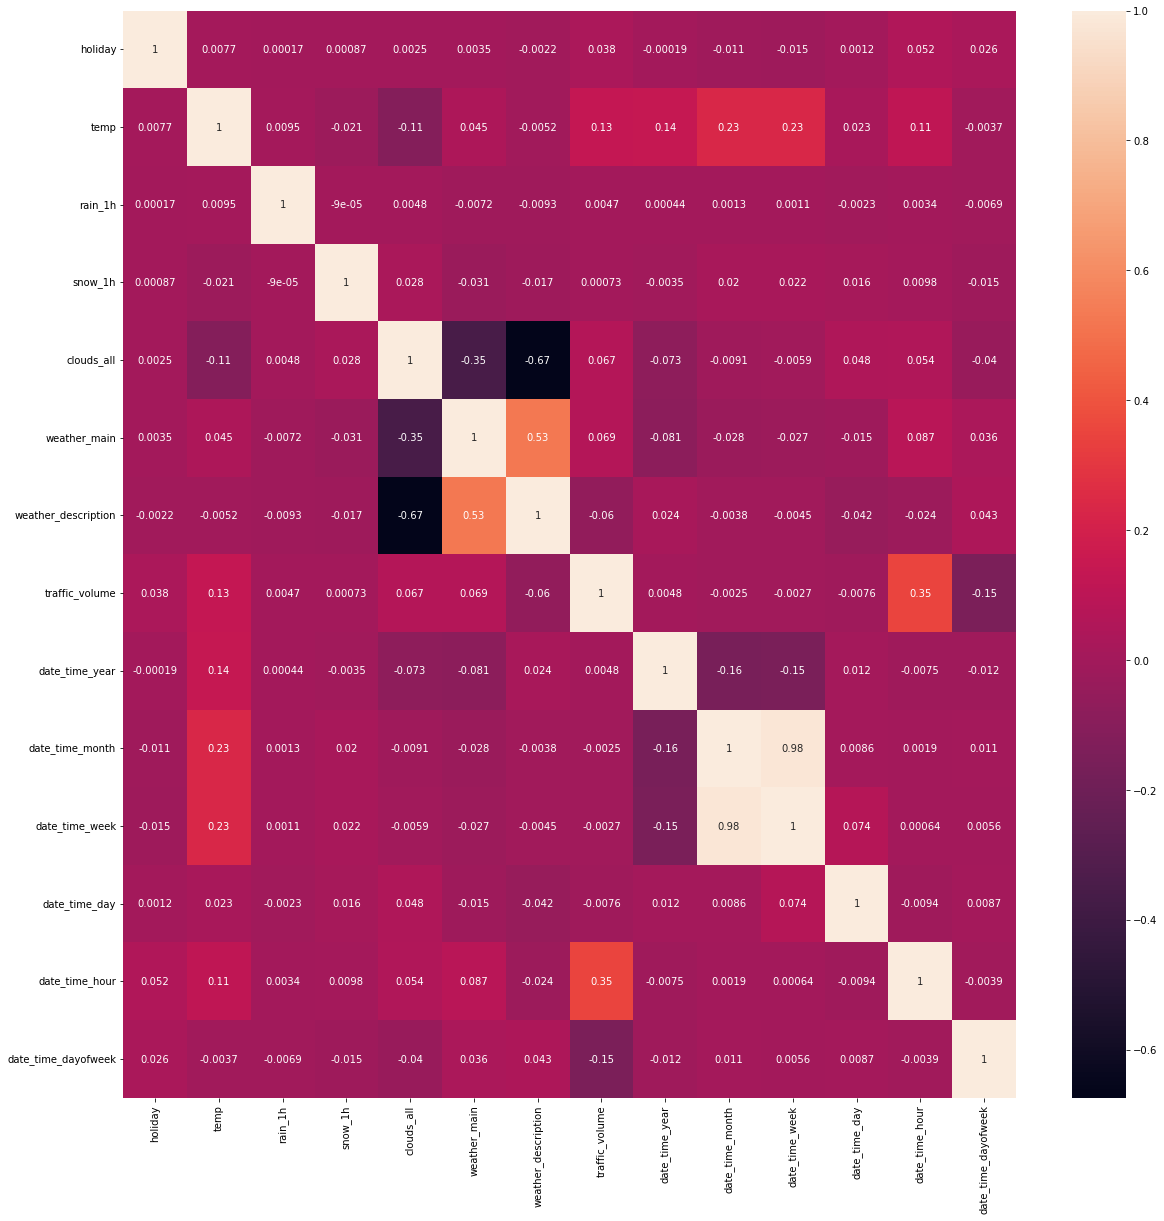

In [257]:
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [258]:
threshold=0.5

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [259]:
correlation(df.iloc[:,:-1],threshold)

{'date_time_week', 'weather_description'}

In [260]:
#split data into X and y
X = df.drop(["traffic_volume",'date_time_week','weather_description'] , axis=1)

y = df["traffic_volume"]

In [261]:
X

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time_year,date_time_month,date_time_day,date_time_hour,date_time_dayofweek
0,12,288.28,0.0,0.0,40,15164,2012,10,2,9,1
1,12,289.36,0.0,0.0,75,15164,2012,10,2,10,1
2,12,289.58,0.0,0.0,90,15164,2012,10,2,11,1
3,12,290.13,0.0,0.0,90,15164,2012,10,2,12,1
4,12,291.14,0.0,0.0,75,15164,2012,10,2,13,1
...,...,...,...,...,...,...,...,...,...,...,...
48199,12,283.45,0.0,0.0,75,15164,2018,9,30,19,6
48200,12,282.76,0.0,0.0,90,15164,2018,9,30,20,6
48201,12,282.73,0.0,0.0,90,1034,2018,9,30,21,6
48202,12,282.09,0.0,0.0,90,15164,2018,9,30,22,6


## RandomForestRegressor

In [262]:
# Models from Scikit-Learn
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [263]:
np.random.seed(42)

#split data into train & test 
X_train ,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.25)

In [264]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0 )
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=200, random_state=0)

In [265]:
regressor.score(X_test, y_test)

0.9690192268482539

## XG Boost

In [266]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [267]:
xgb.score(X_test, y_test)

0.9721592122926828

## Voting Regressor

In [268]:
from sklearn.ensemble import VotingRegressor

regressors = [ ('Random Forest', regressor),
              ('XgBoost', xgb)]

vr = VotingRegressor(estimators = regressors, n_jobs = -1, verbose = 1, weights = (0.45, 0.55))
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(n_estimators=200,
                                                   random_state=0)),
                            ('XgBoost',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, max_cat_to_onehot=4,
                                          max_delta_step=0, max_depth=6,
                                          max_leaves=0, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...))],
                n_jobs=-1, verbose=1, weights=(0.45, 0.55))

In [269]:
vr.score(X_test, y_test)

0.9739698394754414

## Evaluation Matrix

In [270]:
y_preds = vr.predict(X_test)

In [271]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_preds)
print(r2)

0.9739698394754414


In [272]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)
mae

187.22913420900696

In [273]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

102942.91931019461

## Result

In [274]:
print(f"r2_score is {round(r2*100,2)}")
print(f"Mean absolute error is {round(mae,2)}")
print(f"Mean squared error is {round(mse,2)}")
print("RMSE",round(np.log(np.sqrt(mean_squared_error(y_test,y_preds))),2))

r2_score is 97.4
Mean absolute error is 187.23
Mean squared error is 102942.92
RMSE 5.77


In [277]:
import pickle
filename = 'metro.pkl'
pickle.dump(vr, open(filename, 'wb'))

Feature: 0, Score: 0.00105
Feature: 1, Score: 0.00749
Feature: 2, Score: 0.00795
Feature: 3, Score: 0.00226
Feature: 4, Score: 0.00363
Feature: 5, Score: 0.00896
Feature: 6, Score: 0.00801
Feature: 7, Score: 0.01497
Feature: 8, Score: 0.01103
Feature: 9, Score: 0.78521
Feature: 10, Score: 0.14946


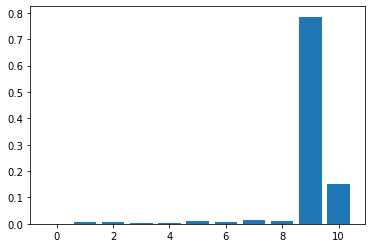

In [278]:
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
     print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()